In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Display the columns

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Claculate Mean for each column of the dataset

In [6]:
data.mean(numeric_only=True)

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### Checking the Null values 

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Visualizing the data

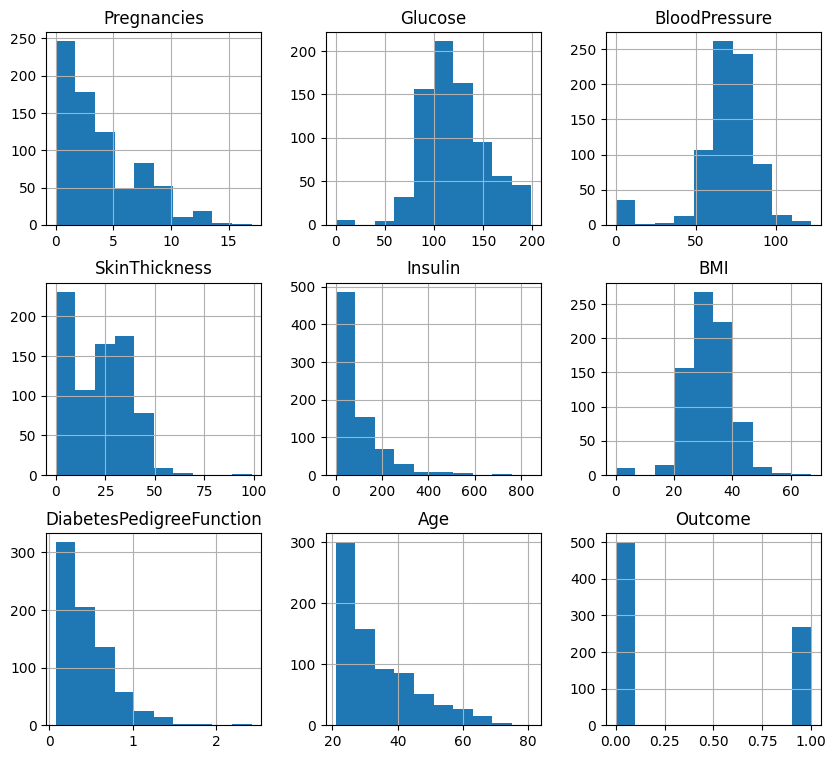

In [8]:
fig, axis = plt.subplots(3,3, figsize =(10,9))
data.hist(ax = axis)
plt.show();

#### Count of Diabetic and Non-Diabetic people 

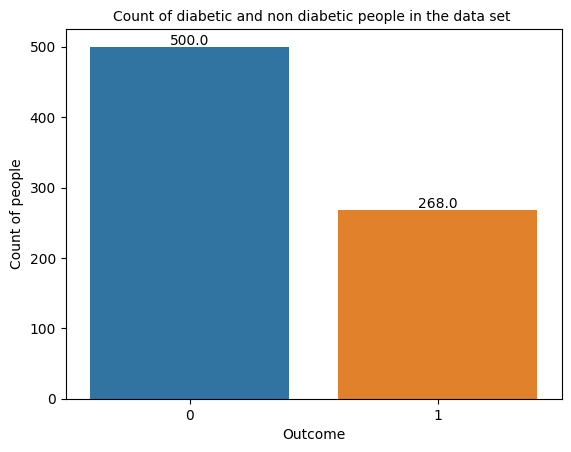

In [9]:
graph = sns.countplot(x = data['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count of people')
plt.title('Count of diabetic and non diabetic people in the data set ', fontdict={'fontsize': 10})

i=0
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 3,
            height, ha="center")
        i += 1
plt.show()        

65% of samples in the data set are non-daibetic. 35 % are diabetic

#### Glucose - Insulin plot

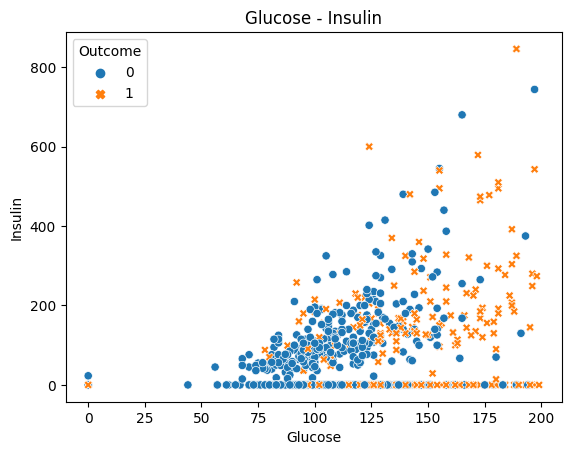

In [10]:
sns.scatterplot(x= data['Glucose'], y = data['Insulin'], hue=  data['Outcome'], style = data['Outcome'])
plt.title('Glucose - Insulin')
plt.show();

The Glucose- Insulin plot clearly shows that in majority of non-diabetic persons, the insulin produced can effectively control the glucose in the body.

As the glucose levels increase the produced insulin are not effective in regulating glucose levels, making the person diabetic.

#### Effect of  Pregnancies in making a person diabetic

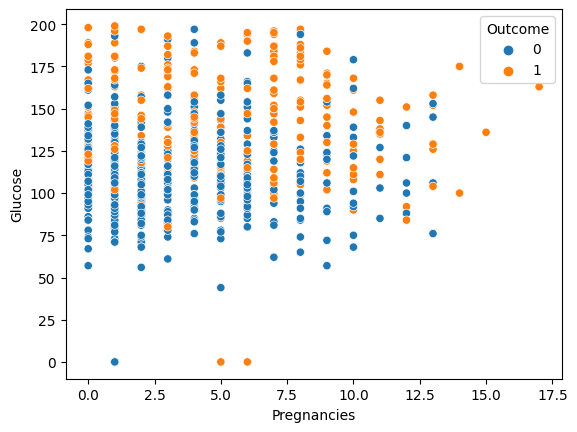

In [11]:
sns.scatterplot(y= data['Glucose'],x = data['Pregnancies'] , hue=  data['Outcome']);

##### For pregnancies >=5

In [12]:
data_preg = data[data['Pregnancies'] >=5]

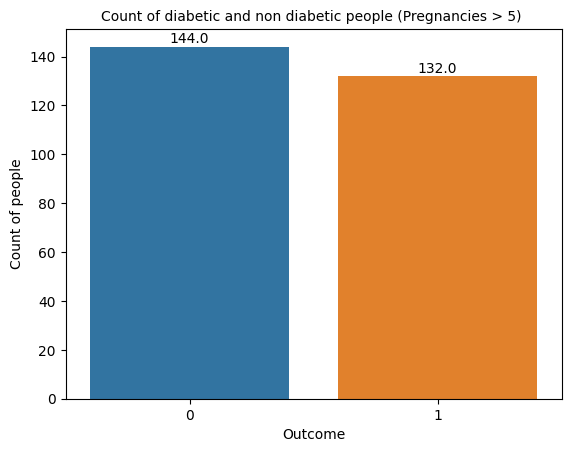

In [13]:
graph = sns.countplot(x = data_preg['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count of people')
plt.title('Count of diabetic and non diabetic people (Pregnancies > 5) ', fontdict={'fontsize': 10})

i=0
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 1.5,
            height, ha="center")
        i += 1
plt.show()      

For persons who had been pregnant five times or more, 48% of them are found to be diabetic.  

#### Effect of BMI and Pregnancies on Diabetes

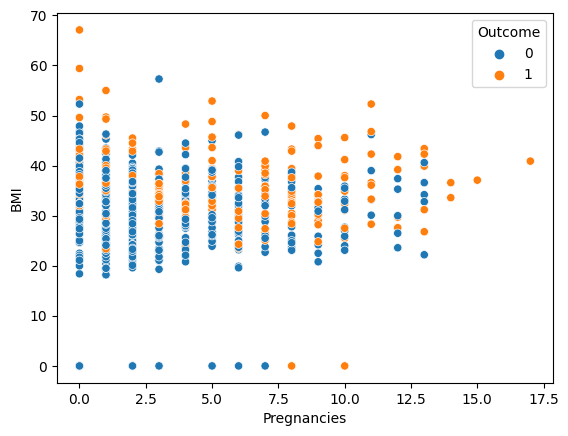

In [14]:
sns.scatterplot(y= data['BMI'],x = data['Pregnancies'] , hue=  data['Outcome']);

It can be seen that people with BMI over 25 and been pregnant for five times or more have higher chances of being diabetic

##### Case of Overweight (BMI >= 25)

In [15]:
data_bmi_preg = data[(data['BMI'] >= 25) & (data['Pregnancies'] >= 5)]

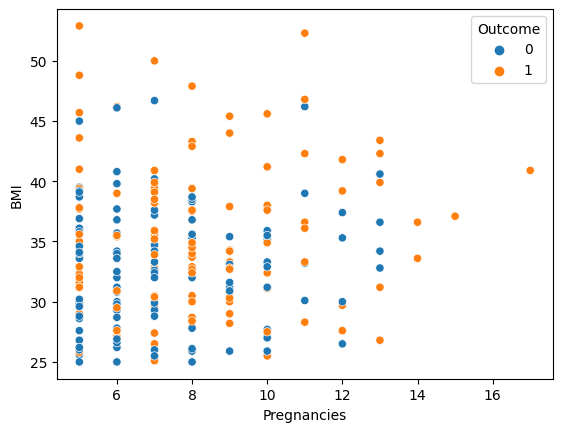

In [16]:
sns.scatterplot(y= data_bmi_preg['BMI'],x = data_bmi_preg['Pregnancies'] , hue=  data_bmi_preg['Outcome']);

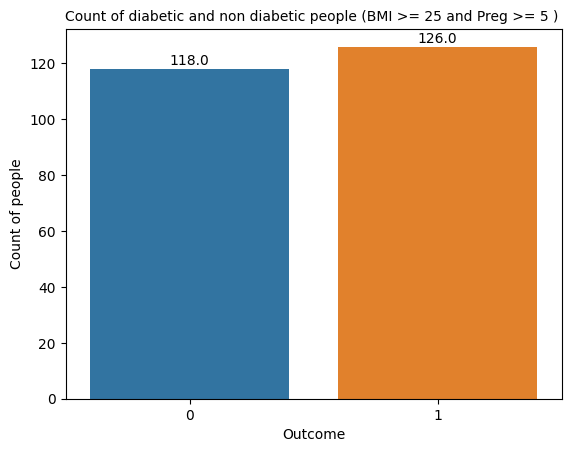

In [17]:
graph = sns.countplot(x = data_bmi_preg['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count of people')
plt.title('Count of diabetic and non diabetic people (BMI >= 25 and Preg >= 5 ) ', fontdict={'fontsize': 10})

i=0
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 1.5,
            height, ha="center")
        i += 1
plt.show()     

51 % of patients with BMI above 25 (Over Weight/ Obese) and who had been five times or more pregnant are  found to be diabetic.

###### Case of Obesity (BMI above 30)

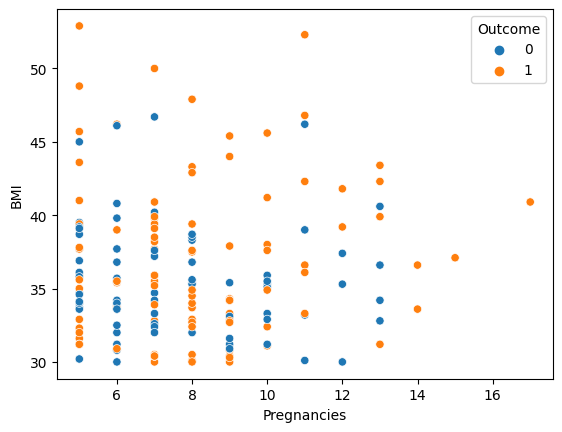

In [18]:
data_bmi_preg1 = data[(data['BMI'] >= 30) & (data['Pregnancies'] >= 5)]
sns.scatterplot(y= data_bmi_preg1['BMI'], x = data_bmi_preg1['Pregnancies'] , hue=  data_bmi_preg1['Outcome']);


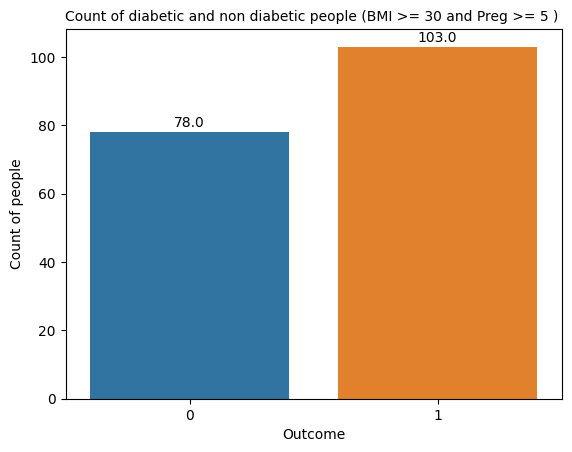

In [19]:
graph = sns.countplot(x = data_bmi_preg1['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count of people')
plt.title('Count of diabetic and non diabetic people (BMI >= 30 and Preg >= 5 ) ', fontdict={'fontsize': 10})

i=0
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 1.5,
            height, ha="center")
        i += 1
plt.show()     

57 % of patients with BMI above 30 (Obese) and who had been five times or more pregnant are  found to be diabetic.